## Data Analysis with Scikit Learn

ScikitLearn provides a lot of different classification and clustering algorithms. The application of those algorithms always follows a similar process: 

1. Loading the data
2. Exploring the data
3. Data Transformation
4. Preparing training and test data
5. Classification 
6. Performance evaluation

Let us start with the imports... It is good practice to do that at the beginning of your coding. In case you find out that you need more imports, you can add them later.

In [49]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

### Loading the data

In [22]:
df = pd.read_csv('data/titanic.csv')

### Exploring the data

Looking at the data helps you
- identify noisy data such as missing values
- attributes you need to transform in order to use them for classification
- aquire domain knowledge. What attributes might affect the classification the most?

This part can take a lot of time. In this example, we will (only) look at the most common data analysis questions. 

Is the data ok in principle? Are there missing values? 
You can check this for the different attributes with the info() method.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As you can see, there are 891 instances (i.e. passengers that either survived or not). Most of the attributes have 891 non-null values expect of Age, Cabin and Embarked. If you think those attributes are not important for your analysis, you can just drop them. If you want to include them, you need to fill the missing values with standard values (for example the mean of the column). In this example, we will not use them for classification.

How do we decide, which attributes to keep? Besides removing noisy data, we also look at the distribution of values of the different columns. To visualize the distribution, we import the library `seaborn`. As you can see, the third class was mainly occupied by men. 

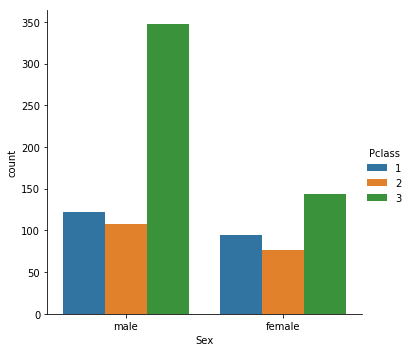

In [52]:
sns.catplot('Sex',data=df,hue='Pclass',kind='count')
#df.groupby('Survived').Pclass.hist()

### Data Transformation

Are there variables we need to transform? For example, the classification algorithms can not deal with object variables. If we want to include them in the classification process, we need to transform them into Integer variables. The 'Sex' attribute is probably of high importance as more women survived than men. So it is worth to include 'Sex' into the classification dataset. Therefore, we need to transform it.

First we have a closer look with the describe() method. 

In [33]:
print(df['Sex'].describe())


count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
['male' 'female']


To show the different values, you can use the unique() method. These values are then transformed by the LabelEncoder of Pandas Preprocessing
Library. We could also use OneHotEncoding (check the documentary), but as we have a binary variable, the LabelEncoder is 
ok. Basically, the attribute value 'male' is transformed into '0', the attribute 'female' is transformed into 1.

In [34]:
print(df['Sex'].unique())

['male' 'female']


In [53]:
# LabelEncoder can be used to transform non-numerical labels into numerical ones
labelenc = preprocessing.LabelEncoder()
# Fit variable Sex 
labelenc.fit(df.Sex)
df['sex_transform'] = labelenc.transform(df.Sex)

### Preparing training and test data

For our final training dataset, we select only a few of the columns provided in the dataset. The data is assigned to a new variable `train`. You can select certain columns with the `loc` method. `loc[:,['Age']]` means, that you select all rows, but only the `Age` column.

We will not select instances with null values. In order to drop those instances, you can use the method `dropna()`.

In [38]:
train = df.loc[:,['Age', 'Fare', 'sex_transform', 'Survived']].dropna()
train.shape

(714, 4)

The type of machine learning we will be doing is called classification, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying. 

The attribute containing the information wether a passenger survived or not is the 'Survived' attribute. This is the target variable. `Age`, `Fare` and `sex_transform` are the feature variables, describing the different instances. 

Seperate data into the feature variables and the target variables. The variable `y` contains the target variable. `X` contains the feature variables.

In [37]:
y = train['Survived']
X = train.drop('Survived', axis=1)

Next, we split the data into training and test data. The training data is used to build a classification model, in our case a Decision Tree classifier. The test data can be used to evaluate our model. Training and test data are separate datasets, because we want to avoid any bias. The model is supposed to work well on unknown examples, not on examples already looked at of the training dataset.

We imported the method `train_test_split` from `sklearn.model_selection`. This method can be used for the creation of train and test data. We will do this for the features as well as for the target variable. The test dataset can be smaller than the training dataset (about 40%). Training and test examples are selected randomly.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10, shuffle = True)

### Classification

The classification itself is not much code. Of course, we could tune different parameters or look at different machine learning methods. But lets keep it simple and focus on the simple `Decision Tree Classifier`.

We first initialize the classifier. In scikit-learn, an estimator for classification (i.e. the classifier) is a Python object that implements the methods `fit(X, y)` and `predict(T)`. The estimator's constructor takes as input the model parameter. For the `Decision Tree Classifier` we define the maximal depth of the tree, which is 5.

In [18]:
clf = DecisionTreeClassifier(max_depth=5)

The classifier is then trained with the `fit()` method. The fitting takes place with the training data. 

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Performance evaluation

Finally, we are curious wether the fitted model performs well on new training data. The `score()` method computes the default score for the specific classification method. In our case, this is the accuracy value. 

In [20]:
# Computation of the metric
clf.score(X_test, y_test)

0.7937062937062938